In [57]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

X shape (100, 2)
Cluster membership: [0 2 0 2 2 0 0 2 1 0 2 1 1 2 2 0 2 1 2 1 1 0 1 1 1 0 1 0 1 1 0 0 1 2 2 2 2
 0 2 2 0 2 2 2 1 0 1 0 1 2 0 1 0 0 0 2 1 2 2 2 1 1 1 1 0 0 0 2 1 0 0 1 0 2
 0 0 0 1 0 1 1 2 2 0 2 2 0 2 0 2 0 1 1 2 0 1 2 1 1 1]


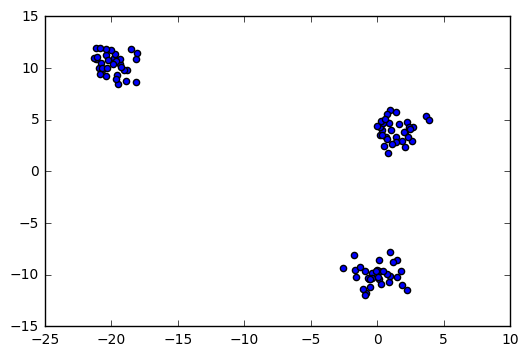

In [102]:
num_centers = 3
num_features = 2
center_array = [(0,-10), (-20,10), (1.5,4)]
# cluster_std=0.3
X, y = make_blobs(n_samples=100, centers=center_array, n_features=2,random_state=0)
print('X shape', X.shape)
# print('X')
# print(X)
print('Cluster membership:', y)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [103]:
class Cluster(object):
    def __init__(self, vec, node_id, left=None, right=None):
        self.vec = vec
        self.node_id = node_id
        self.left = left
        self.right = right
    
    def cluster_distance(self, other):
        dist = np.sqrt(np.sum((self.vec - other.vec)**2))
        return dist 
    
def agglomerative_clustering(X, clusters_required=1):
    distance = {}
    num_samples = X.shape[0]
    clusters_created = num_samples
    clusters = [Cluster(X[i], i) for i in range(num_samples)]
    new_id = 0
    while clusters_created > clusters_required:
        dmin = clusters[0].cluster_distance(clusters[1])
        pairmin = (0, 1)
        
        for i in range(clusters_created):
            for j in range(i+1, clusters_created):
                if (clusters[i].node_id, clusters[j].node_id) not in distance:
                    distance[(clusters[i].node_id, clusters[j].node_id)] = clusters[i].cluster_distance(clusters[j])
                    
                    if distance[(clusters[i].node_id, clusters[j].node_id)] < dmin:
                        dmin = distance[(clusters[i].node_id, clusters[j].node_id)]
                        pairmin = (i, j)
                        
        left_child = clusters[pairmin[0]]
        right_child = clusters[pairmin[1]]
        new_id -= 1
        new_vec = (left_child.vec + right_child.vec)/2
        new_cluster = Cluster(new_vec, new_id, left_child, right_child)
        del clusters[pairmin[1]]
        del clusters[pairmin[0]]
        clusters.append(new_cluster)
        clusters_created -= 1
    return clusters
                

[[-18.54173239  11.19220719]
 [ -0.79456239 -11.08239336]
 [  2.05231217   4.50250643]]


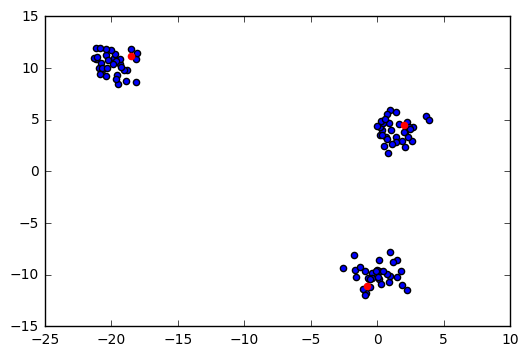

In [105]:

clusters = agglomerative_clustering(X, num_centers)
mean_clusters = np.ones((num_centers, num_features))
for i in range(len(clusters)):
#     print(i, ': ', clusters[i].vec)
    mean_clusters[i] = clusters[i].vec
print(mean_clusters)   
plt.scatter(X[:,0], X[:,1])
plt.scatter(mean_clusters[:,0], mean_clusters[:,1], color ='r')
plt.show()

    